In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Natural Cubic Spline Interpolation

Given $N+1$ data points $(t_0,y_0), \dots , (t_N,y_N)$ we want to construct the **natural cubic spline**: a piecewise cubic polynomial function $p(t)$ such that:
* $p(t)$ is defined by $N$ cubic polynomials $p_1(t),p_2(t),\dots,p_N(t)$
* Each $p_k(t)$ is defined on the subinterval $[t_{k-1},t_k]$
* $p(t)$ is continuous
* $p(t)$ is smooth (ie. $p'(t)$ and $p''(t)$ are continuous)

## Example 1

Consider $(0,0),(1,1),(2,0)$. Let's use [`scipy.interpolate.CubicSpline`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) to compute the natural cubic spline.

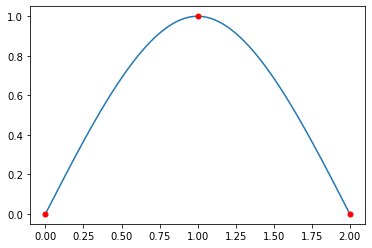

In [2]:
t1 = [0,1,2]
y1 = [0,1,0]
cs1 = CubicSpline(t1,y1,bc_type='natural')
T1 = np.linspace(0,2,200)
Y1 = cs1(T1)
plt.plot(T1,Y1,t1,y1,'r.',markersize=10)
plt.show()

Verify the coefficient matrix:

In [3]:
cs1.c

array([[-0.5,  0.5],
       [ 0. , -1.5],
       [ 1.5,  0. ],
       [ 0. ,  1. ]])

## Example 2

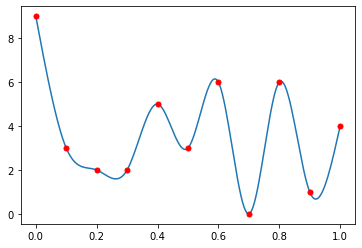

In [4]:
N = 10
t2 = np.linspace(0,1,N+1)
y2 = np.random.randint(0,10,N+1)
cs2 = CubicSpline(t2,y2,bc_type='natural')
T2 = np.linspace(0,1,200)
Y2 = cs2(T2)
plt.plot(T2,Y2,t2,y2,'r.',markersize=10)
plt.show()

## Example 3

Let's interpolate the points $\sin(\pi t_k)$ for $t_k = k/N$ for $N=15$ with added noise.

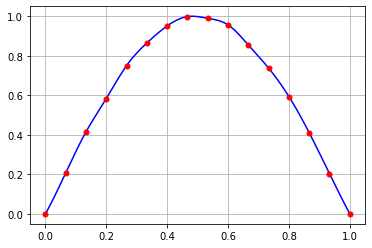

In [5]:
N = 15
t3 = np.linspace(0,1,N+1)
noise = 0.005*np.random.randn(t3.size)
y3 = np.sin(np.pi*t3) + noise
cs3 = CubicSpline(t3,y3)
T3 = np.linspace(0,1,200)
Y3 = cs3(T3)
plt.plot(T3,Y3,'b-',t3,y3,'r.',markersize=10)
plt.grid(True)
plt.show()

The cubic spline is not sensitive to small changes in the $y$ values.